In [1]:
import retinanalysis as ra
import importlib
import pandas as pd
import numpy as np
# import xarray as xr
display(ra.settings.mea_config)
import matplotlib.pyplot as plt
# ra.database_pop.reload_celltypefiles()
# ra.database_utils.populate_database()

# import sys
# sys.path.append('/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/src/retinanalysis/')
# import response, analysis_chunk
# import importlib
# importlib.reload(response)
# importlib.reload(analysis_chunk)

# sys.path.append('/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/src/retinanalysis/')
# import ei_utils as eiu
# import importlib
# importlib.reload(eiu)

[2025-07-08 13:27:16,887][INFO]: Connecting root@127.0.0.1:3306
[2025-07-08 13:27:16,986][INFO]: Connected root@127.0.0.1:3306


{'data': '/Volumes/Vyom MEA/analysis',
 'analysis': '/Volumes/Vyom MEA/analysis',
 'h5': '/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/data',
 'meta': '/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta',
 'tags': '/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/tags',
 'user': 'vyomr'}

In [2]:
df = ra.get_datasets_from_protocol_names('protocols.spatialnoise')
# df = ra.get_datasets_from_protocol_names('mat')
df[df.exp_name=='20250514C']


Found 2 protocols matching "protocols.spatialnoise":
['manookinlab.protocols.SpatialNoise'
 'manookinlab.protocols.SpatialNoiseAndMotion']
No epochs found for block 2372

Found 45 experiments, 199 epoch blocks.



,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
175,20250514C,data000,0.5,chunk1,manookinlab.protocols.SpatialNoise,1,20250514C/data000,Spatial Noise,138,3,2438,3659,499
176,20250514C,data001,0.5,chunk1,manookinlab.protocols.SpatialNoise,1,20250514C/data001,Spatial Noise,138,3,2438,3660,499
177,20250514C,data006,0.5,chunk2,manookinlab.protocols.SpatialNoise,1,20250514C/data006,Spatial Noise 30 R*,138,3,2443,3665,500
178,20250514C,data010,0.5,chunk3,manookinlab.protocols.SpatialNoise,1,20250514C/data010,noise photopic,138,3,2447,3669,506


In [3]:
# import sys
# sys.path.append('/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/src/retinanalysis/')
# import mea_pipeline as mp
# import importlib
# importlib.reload(mp)

idx = 175
# idx = 189
exp_name = df.at[idx, 'exp_name']
datafile_name = df.at[idx, 'datafile_name']
# pp = ra.create_pipeline(exp_name, datafile_name)
s1 = ra.StimBlock(exp_name, datafile_name)
ac1 = ra.AnalysisChunk(exp_name, s1.nearest_noise_chunk)
r1 = ra.ResponseBlock(exp_name, datafile_name)
r1.bin_spike_times_by_frames()

Nearest noise chunk for data000 is chunk1 with distance 4 minutes.

Loading VCD from /Volumes/Vyom MEA/analysis/20250514C/chunk1/kilosort2.5 ...
VCD loaded with 781 cells.
Loaded spatial maps for channels [0, 2] and 781 cells of shape (127, 203, 2)
Spatial maps have been padded to align with RF parameters.
Loading VCD from /Volumes/Vyom MEA/analysis/20250514C/data000/kilosort2.5 ...
VCD loaded with 769 cells.


Binning spikes for cells: 100%|██████████| 769/769 [00:07<00:00, 99.67it/s] 


Mean frame rate: 59.94 Hz


In [4]:
# ls_types = ['OffP', 'OffM', 'OnP', 'OnM']
# ls_cells = [6, 8]
# ls_cells = [pp.match_dict[k] for k in ls_cells]
# # print(ls_cells)
# pp.plot_rfs(cell_types=ls_types)
# # pp.plot_rfs(protocol_ids=ls_cells)
# # pp.plot_timecourses(protocol_ids=ls_cells)
# pp.plot_timecourses(cell_types=ls_types)

In [5]:
cell_idx = 2
cell_id = r1.cell_ids[cell_idx]
if cell_id not in ac1.cell_ids:
    print(f'Cell {cell_id} not found in analysis chunk {ac1.name}')
print(cell_id)
center_row, center_col = ac1.rf_params[cell_id]['center_y'], ac1.rf_params[cell_id]['center_x']
center_row = int(center_row)
center_col = int(center_col)
print(center_row, center_col)
n_pad = 40

129
76 102


In [6]:
s1.regenerate_stimulus(ls_epochs=[0])#, center_row=center_row, center_col=center_col, n_pad=n_pad)

Regenerating stimulus for epochs: [0] in block: data000


100%|██████████| 1/1 [00:26<00:00, 26.35s/it]


Made stimulus of shape: (1, 10819, 127, 203, 3)


In [7]:
# e_idx = 3
# fts = s1.df_epochs.at[e_idx, 'frame_times_ms']
# pre_time = s1.df_epochs.at[e_idx, 'preTime']
# unique_time = s1.df_epochs.at[e_idx, 'epoch_parameters']['uniqueTime']
# total_frames = len(fts)-1
# unique_frames = len(np.where(np.logical_and((fts > pre_time),(fts <= pre_time+unique_time)))[0])

In [8]:
# import sys
# sys.path.append('/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/src/retinanalysis/')
# import regen
# ls_frames = []
# for e_idx in range(1):
#     fts = s1.df_epochs.at[e_idx, 'frame_times_ms']
#     pre_time = s1.df_epochs.at[e_idx, 'preTime']
#     unique_time = s1.df_epochs.at[e_idx, 'epoch_parameters']['uniqueTime']
#     total_frames = len(fts)-1
#     unique_frames = len(np.where(np.logical_and((fts > pre_time),(fts <= pre_time+unique_time)))[0])
    
#     d_e_params = s1.df_epochs.at[e_idx, 'epoch_parameters']
#     d_meta = {
#         'numXStixels': d_e_params['numXStixels'],
#         'numYStixels': d_e_params['numYStixels'],
#         'numXChecks': d_e_params['numXChecks'],
#         'numYChecks': d_e_params['numYChecks'],
#         'chromaticClass': d_e_params['chromaticClass'],
#         'unique_frames': unique_frames,
#         'repeat_frames': total_frames - unique_frames,
#         'stepsPerStixel': d_e_params['stepsPerStixel'],
#         'seed': d_e_params['seed'],
#         'frameDwell': d_e_params['frameDwell'],
#     }
#     if 'gaussianFilter' in d_e_params:
#         d_meta['gaussianFilter'] = d_e_params['gaussianFilter']
#     if 'filterSdStixels' in d_e_params:
#         d_meta['filterSdStixels'] = d_e_params['filterSdStixels']
#     frames = regen.get_spatial_noise_frames(**d_meta)
#     print(frames.shape)
#     # Crop frames around the cell center
#     frames = frames[:, center_row-n_pad:center_row+n_pad+1, center_col-n_pad:center_col+n_pad+1, 0]
#     print(frames.shape)
#     ls_frames.append(frames)
#     break

In [9]:
s1.stim_frames.shape#, ls_frames[0].shape

(1, 10819, 127, 203, 3)

## Test STA

In [19]:
lags = np.arange(0,15)

test = np.zeros((len(lags), s1.stim_frames[0].shape[1], s1.stim_frames[0].shape[2]))
pre_bins = r1.bin_rate * s1.df_epochs.at[0, 'epoch_parameters']['preTime'] * 1e-3
pre_bins = np.round(pre_bins).astype(int)
for e_idx in range(len(s1.stim_frames)):
    for i, lag in enumerate(lags):
        frames = s1.stim_frames[e_idx, :,:,:, 0]
        print(frames.shape)
        bs = r1.df_spike_times.at[cell_idx, 'binned_spikes'][e_idx, pre_bins:pre_bins + len(frames)]
        if lag > 0:
            bs = bs[lag:]
            frames = frames[:-lag]
        print(frames.shape, bs.shape)
        mask = np.where(bs > 0)[0]
        print(mask.shape)
        if len(mask) == 0:
            print(f'No spikes found for cell {cell_id} in epoch {e_idx}')
            continue
        bs = bs[mask]
        frames = frames[mask]
        frames = np.moveaxis(frames, 0, -1)
        print(bs.shape, bs.sum())
        print(len(mask))
        # test += (frames * bs[:,None, None, None]).sum(axis=0)
        test[i] += np.matmul(frames, bs)
        # break

(10819, 127, 203)
(10819, 127, 203) (10805,)
(4085,)
(4085,) 4238.0
4085
(10819, 127, 203)
(10818, 127, 203) (10804,)
(4085,)
(4085,) 4238.0
4085
(10819, 127, 203)
(10817, 127, 203) (10803,)
(4085,)
(4085,) 4238.0
4085
(10819, 127, 203)
(10816, 127, 203) (10802,)
(4085,)
(4085,) 4238.0
4085
(10819, 127, 203)
(10815, 127, 203) (10801,)
(4085,)
(4085,) 4238.0
4085
(10819, 127, 203)
(10814, 127, 203) (10800,)
(4085,)
(4085,) 4238.0
4085
(10819, 127, 203)
(10813, 127, 203) (10799,)
(4085,)
(4085,) 4238.0
4085
(10819, 127, 203)
(10812, 127, 203) (10798,)
(4085,)
(4085,) 4238.0
4085
(10819, 127, 203)
(10811, 127, 203) (10797,)
(4085,)
(4085,) 4238.0
4085
(10819, 127, 203)
(10810, 127, 203) (10796,)
(4085,)
(4085,) 4238.0
4085
(10819, 127, 203)
(10809, 127, 203) (10795,)
(4084,)
(4084,) 4237.0
4084
(10819, 127, 203)
(10808, 127, 203) (10794,)
(4084,)
(4084,) 4237.0
4084
(10819, 127, 203)
(10807, 127, 203) (10793,)
(4084,)
(4084,) 4237.0
4084
(10819, 127, 203)
(10806, 127, 203) (10792,)
(4084,

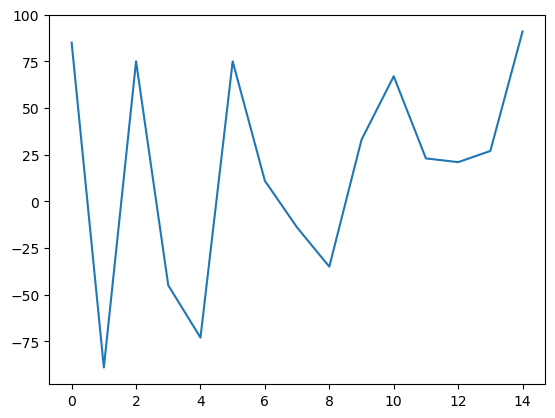

In [11]:
plt.plot(test[:,test.shape[1]//2, test.shape[2]//2])

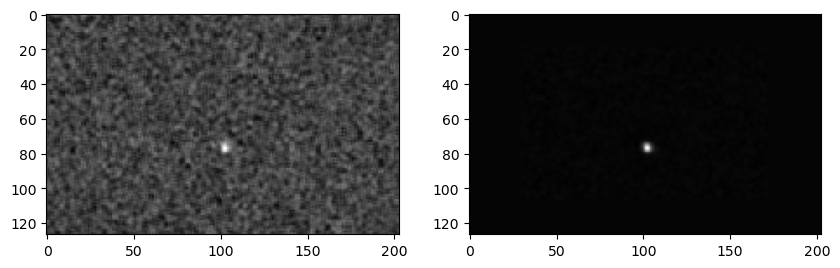

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(test[3,:,:], cmap='gray')
plt.subplot(122)
plt.imshow(ac1.d_spatial_maps[cell_id][:,:,0], cmap='gray')

In [15]:
np.unravel_index(np.argmax(ac1.d_spatial_maps[cell_id][:,:,0]), (127,203)) 

(77, 102)

In [17]:
np.unravel_index(np.argmax(test[3,:,:]), (127,203)) 

(77, 76)

In [18]:
203-76

127